In [1]:
#####################################################################################################################
#Developed by Jonathan Ojeda 18/2/2021 QAAFI UQ
# Code functionalities:
# Define the cluster number to be used by k-means 
#####################################################################################################################

In [1]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#Extend screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [16]:
data0 = pd.read_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\data\newenv.csv')
data = data0.drop(['Unnamed: 0'], axis=1)
data.head()

,lat,lon,rain_a,radn_a,rain_b,radn_b,rain_c,radn_c,wind_a,hur_a,...,tmean_c,radn,rain,tmin,tmax,tmean,wind,hur,hurtmax,cropland
0,25.25,-81.25,208.720205,1760.205241,399.064300,1587.924530,378.008811,1360.146956,3.597331,71.568210,...,27.746450,4708.276727,985.793316,24.188627,30.993357,27.590994,3.268429,81.542140,66.210000,0.0
1,25.25,-80.75,253.500109,1617.158845,439.977989,1463.146197,441.357791,1264.659323,3.656406,71.736855,...,27.387226,4344.964365,1134.835888,24.247671,30.081070,27.164370,3.356894,79.603455,66.424290,0.0
2,25.75,-81.75,195.829374,1778.060071,454.813932,1605.138435,384.780232,1368.051625,3.260802,73.799330,...,27.606195,4751.250131,1035.423537,23.898031,30.925558,27.411795,2.946319,82.660400,66.636986,0.0
3,25.75,-81.25,229.691330,1727.683188,511.249461,1551.324274,415.540824,1332.511129,2.963778,66.274124,...,27.413973,4611.518590,1156.481615,23.618965,30.483063,27.051012,2.657388,79.238670,64.114230,0.0
4,25.75,-80.75,274.451211,1578.892953,513.683174,1411.420895,444.733343,1227.496463,3.282360,71.498790,...,27.460142,4217.810310,1232.867728,23.792383,30.200264,26.996325,2.962619,80.236580,65.923670,0.0


<AxesSubplot:ylabel='Frequency'>

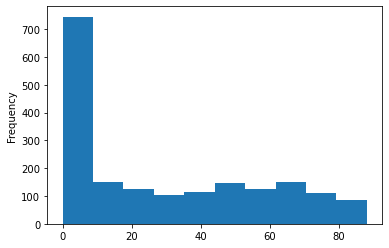

In [17]:
data.cropland.plot.hist()

In [19]:
categorical_features = ['lat', 'lon']
continuous_features = ['rain_a', 'radn_a', 'rain_b', 'radn_b', 'rain_c',
       'radn_c', 'wind_a', 'hur_a', 'hurtmax_a', 'cropland_a', 'tmax_a',
       'tmin_a', 'tmean_a', 'wind_b', 'hur_b', 'hurtmax_b', 'cropland_b',
       'tmax_b', 'tmin_b', 'tmean_b', 'wind_c', 'hur_c', 'hurtmax_c',
       'cropland_c', 'tmax_c', 'tmin_c', 'tmean_c']

In [20]:
data[continuous_features].describe()

,rain_a,radn_a,rain_b,radn_b,rain_c,radn_c,wind_a,hur_a,hurtmax_a,cropland_a,...,tmax_b,tmin_b,tmean_b,wind_c,hur_c,hurtmax_c,cropland_c,tmax_c,tmin_c,tmean_c
count,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,...,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000
mean,213.064034,1402.148304,229.748500,1528.640168,198.236852,1098.397208,2.253653,66.938422,45.699212,28.581183,...,30.476969,18.745693,24.611331,1.992698,67.087402,46.445128,28.581183,25.086064,12.775348,18.930706
std,56.319492,121.818224,69.102795,100.070656,54.191492,125.437241,1.032417,11.556331,9.203349,28.346970,...,3.204505,3.346187,3.176797,0.942846,10.404172,9.263528,28.346970,4.129020,4.228895,4.094030
min,19.077395,1204.612384,79.141111,1361.031751,58.245845,805.028754,0.607565,18.103918,10.338062,0.000000,...,21.431742,9.740942,15.814045,0.499810,37.318672,21.965042,0.000000,15.428803,4.694215,10.061509
25%,178.189279,1312.027659,192.618293,1451.413788,174.562016,1006.983078,1.124097,63.562884,42.505124,0.000000,...,27.948665,16.184849,22.143818,0.977453,60.891525,41.166723,0.000000,21.944504,9.419736,15.660524
50%,219.234803,1373.535865,229.590343,1506.411554,200.887790,1117.411363,2.693230,70.666540,48.628639,20.000000,...,31.071507,19.045173,25.191916,2.332712,66.511145,46.026663,20.000000,25.650935,12.539097,19.095165
75%,257.009936,1469.247264,256.629871,1594.885001,224.294837,1188.374982,3.140553,73.734072,51.219682,54.000000,...,32.847195,21.465805,27.365308,2.767050,74.110033,52.039684,54.000000,28.677338,15.973197,22.224724
max,322.734529,1813.590376,540.639531,1800.523532,444.733343,1384.404329,4.625500,87.508780,66.459305,88.000000,...,38.009026,25.632470,31.405554,4.615524,95.068970,72.242210,88.000000,33.539005,24.887293,27.963638


In [21]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,rain_a,radn_a,rain_b,radn_b,rain_c,radn_c,wind_a,hur_a,hurtmax_a,cropland_a,...,lon_-76.75,lon_-76.25,lon_-75.75,lon_-75.25,lon_-74.75,lon_-74.25,lon_-73.75,lon_-73.25,lon_-72.75,lon_-72.25
0,208.720205,1760.205241,399.064300,1587.924530,378.008811,1360.146956,3.597331,71.568210,56.073944,0.0,...,0,0,0,0,0,0,0,0,0,0
1,253.500109,1617.158845,439.977989,1463.146197,441.357791,1264.659323,3.656406,71.736855,58.279396,0.0,...,0,0,0,0,0,0,0,0,0,0
2,195.829374,1778.060071,454.813932,1605.138435,384.780232,1368.051625,3.260802,73.799330,57.699978,0.0,...,0,0,0,0,0,0,0,0,0,0
3,229.691330,1727.683188,511.249461,1551.324274,415.540824,1332.511129,2.963778,66.274124,51.182804,0.0,...,0,0,0,0,0,0,0,0,0,0
4,274.451211,1578.892953,513.683174,1411.420895,444.733343,1227.496463,3.282360,71.498790,56.944366,0.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [23]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

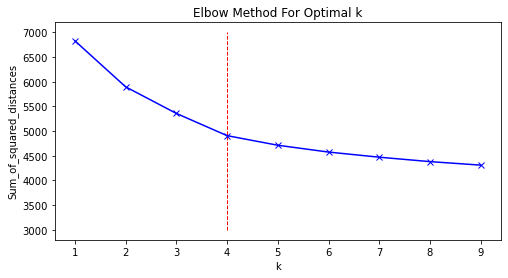

In [24]:
fig = plt.figure(figsize=(8,4))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
ax = plt.gca()
#ax.set_ylim([100000,150000])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.plot([4,4],[3000,7000],"--",color="red", linewidth=1,zorder=1)
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\kmeans.png', dpi=300,bbox_inches='tight')